Confusion Matrix:
[[24  3]
 [ 7 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.94      0.87      0.90        52

    accuracy                           0.87        79
   macro avg       0.86      0.88      0.86        79
weighted avg       0.88      0.87      0.88        79



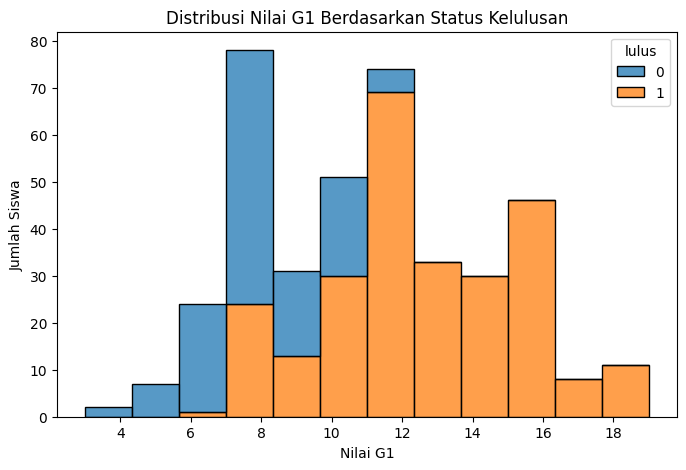

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import requests
import zipfile
import io

# Unduh dataset ZIP dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("student_data")

# Pemuatan data
data = pd.read_csv("student_data/student-mat.csv", sep=";")

# Prapemrosesan: Memilih fitur dan mengubah G3 menjadi biner
data["lulus"] = (data["G3"] >= 10).astype(int)  # Lulus jika G3 >= 10
X = data[["G1", "G2", "studytime", "absences"]]
y = data["lulus"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pelatihan model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="G1", hue="lulus", multiple="stack")
plt.title("Distribusi Nilai G1 Berdasarkan Status Kelulusan")
plt.xlabel("Nilai G1")
plt.ylabel("Jumlah Siswa")
plt.show()